<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Projeto de Análise Exploratória de Dados
---

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Análise Exploratória AAPL</font></h1>
<hr>

In [ ]:
#@title Identificação

#@markdown Turma
Turma = '02 - A ' #@param {type:"string"}
#@markdown Integrantes do Grupo
Aluno1 = 'Gustavo Silva Rios - TIA 23021403' #@param {type:"string"}
Aluno2 = 'Silas de Souza Ferreira - TIA 23005408' #@param {type:"string"}
Aluno3 = 'Rafael Passos - TIA 23015837' #@param {type:"string"}
Aluno4 = 'Israel Soares do Nascimento Viana - TIA 23007052' #@param {type:"string"}



# Problema
  
Devido à instabilidade econômica global que existe atualmente, é comum encontrarmos grande volatilidade nos ativos em geral, principalmente em ações.
Entretanto nosso objetivo é demonstrar que algumas ações se mantiveram resilientes durante esse período, que é o exemplo de AAPL


# Descrição e origem dos dados

Os dados foram retirados da biblioteca yfinance do próprio Python. O período selecionado data de 01/01/2023 a 31/01/2023, e o ativo escolhido foi a ação da Apple (AAPL) listada na Nasdaq.






# Aquisição dos Dados

Fizemos algumas buscas a fim de evitar inconsistências nos dados, foram elas
- Busca por valores nulos
- Busca por dados duplicados
- Busca por Outliers
- Verificação dos tipos de valores
- Verificação de dados duplicados






In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from sklearn.feature_selection import mutual_info_regression

# Defina o símbolo do ativo que você deseja analisar
ativo = "AAPL"  # Exemplo: Apple Inc.

# Defina o intervalo de datas desejado
data_inicio = "2023-01-01"
data_fim = "2023-02-01"

# Baixe os dados do Yahoo Finance e renomeie o DataFrame para 'df'
df = yf.download(ativo,
                 start=data_inicio,
                 end=data_fim)

[*********************100%%**********************]  1 of 1 completed


## **Exiba as primeiras linhas dos dados**

In [ ]:
display(df.head())
display(df.info())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374802,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.657639,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325073,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899506,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426575,70790800


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2023-01-03 to 2023-01-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       20 non-null     float64
 1   High       20 non-null     float64
 2   Low        20 non-null     float64
 3   Close      20 non-null     float64
 4   Adj Close  20 non-null     float64
 5   Volume     20 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 KB


None

# **Verificar o tipo de dados do índice (coluna de datas)**

In [ ]:
print(df.index.dtype)

datetime64[ns]


## **Verificar valores nulos**

In [ ]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# **Conclusões:**

Não foram indentificados valores nulos em nenhuma das colunas deste dataset.

# **Verificar se há linhas duplicadas**

In [ ]:
linhas_duplicadas = df[df.duplicated()]
print(linhas_duplicadas)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


# **Conclusões:**

Foi retornado um dataframe vazio, indicando que não existem valores duplicados no dataset.

# **Verificando a existência de valores negativos**

In [ ]:
linhas_com_valores_negativos = df[(df < 0).any(axis=1)]
print(linhas_com_valores_negativos)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


# **Conclusões:**

Foi retornado um dataframe vazio, indicando que não existem valores negativos nas colunas numéficas do dataset.

# **Verificando a existência de valores com letras: Utilizando o método .str.isnumeric() para verificar se os valores nas colunas são numéricos:**

In [ ]:
colunas_numericas = df.apply(pd.to_numeric, errors='coerce').notna().all()
print(colunas_numericas)

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool


# **Conclusões:**

Todas as colunas do dataset são numéricas. Isso significa que não há valores com letras ou outros caracteres não numéricos nas colunas.

# **Verificação de Outliers:**

In [ ]:
import plotly.subplots as sp

# Definir tamanho personalizado para os gráficos
custom_size = (250, 200)  # Defina o tamanho desejado, por exemplo, (largura, altura)

# Criar uma figura com subplots
fig = sp.make_subplots(rows=1,
                       cols=6,
                       horizontal_spacing=0.1,
                       subplot_titles=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

# Adicionar os boxplots à figura
fig.add_trace(px.box(df, y='Open').update_layout(width=custom_size[0], height=custom_size[1]).data[0], row=1, col=1)
fig.add_trace(px.box(df, y='High').update_layout(width=custom_size[0], height=custom_size[1]).data[0], row=1, col=2)
fig.add_trace(px.box(df, y='Low').update_layout(width=custom_size[0], height=custom_size[1]).data[0], row=1, col=3)
fig.add_trace(px.box(df, y='Close').update_layout(width=custom_size[0], height=custom_size[1]).data[0], row=1, col=4)
fig.add_trace(px.box(df, y='Adj Close').update_layout(width=custom_size[0], height=custom_size[1]).data[0], row=1, col=5)
fig.add_trace(px.box(df, y='Volume').update_layout(width=custom_size[0], height=custom_size[1]).data[0], row=1, col=6)

# Atualizar o layout da figura
fig.update_layout(title="Boxplots das Colunas Numéricas", showlegend=False)

# Exibir a figura
fig.show()

# **Conclusões:**

Não foram encontrados Outliers na maioria das variáveis exceto em Volume, onde foi constatado um volume de negociação discrepante de 110M em um dia de pregão.

# Análise dos Dados


## Estrutura dos Dados

Serão realizadas visualizações e resumos estatísticos em busca de entender melhor os dados.

In [ ]:
display(df.describe())

,Open,High,Low,Close,Adj Close,Volume
count,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,135.126000,137.271498,133.737001,135.778999,135.024281,7.218262e+07
std,5.921998,6.074987,6.448833,6.635885,6.599000,1.342587e+07
min,126.010002,127.769997,124.169998,125.019997,124.325073,5.410510e+07
25%,130.422501,132.872501,129.447498,130.584995,129.859150,6.398552e+07
50%,134.455002,136.769997,133.950005,135.240005,134.488281,6.956585e+07
75%,140.454998,143.200005,139.182499,142.027500,141.238056,8.040838e+07
max,144.960007,147.229996,143.080002,145.929993,145.118835,1.121175e+08


# **Conclusões:**

Com base na análise estatística do conjunto de dados dos valores das ações da Apple no período de 1º de janeiro de 2023 a 31 de janeiro de 2023, podemos destacar algumas observações significativas:

Preços das Ações: Os preços de abertura (Open), fechamento (Close), máxima (High) e mínima (Low) variaram ao longo do período. A média do preço de abertura foi de aproximadamente 135.13, enquanto a média do preço de fechamento foi de cerca de 135.78.

Volatilidade: O desvio padrão revela a volatilidade nos preços das ações, com valores em torno de 5.92 a 6.64 para as diferentes métricas.

Volume de Negociação: O volume de negociação variou consideravelmente, com uma média de aproximadamente 72.18 milhões de ações negociadas. O volume máximo registrado foi de 112.12 milhões, indicando picos de atividade ao longo do período.

Essas estatísticas fornecem uma visão geral do comportamento dos preços das ações da Apple, destacando tanto a tendência geral quanto a volatilidade. Essas informações são cruciais para compreender a dinâmica do mercado financeiro e podem orientar análises mais detalhadas no âmbito de um projeto de data science.


In [ ]:
import plotly.graph_objects as go

# Crie subplots com 2 linhas e 3 colunas
fig = sp.make_subplots(rows=2, cols=3)

# Parâmetros para o contorno das barras
marker_line = dict(
    color='black',
    width=1)

# Opacidade das barras
opacity = 0.75

# Adicione os histogramas aos subplots com contornos nas barras
fig.add_trace(go.Histogram(
    x=df['Open'],
    name='Open',
    marker=dict(line=marker_line),
    opacity=opacity), row=1, col=1)

fig.add_trace(go.Histogram(
    x=df['High'],
    name='High',
    marker=dict(line=marker_line),
    opacity=opacity), row=1, col=2)

fig.add_trace(go.Histogram(
    x=df['Low'],
    name='Low',
    marker=dict(line=marker_line),
    opacity=opacity), row=1, col=3)

fig.add_trace(go.Histogram(
    x=df['Close'],
    name='Close',
    marker=dict(line=marker_line),
    opacity=opacity), row=2, col=1)

fig.add_trace(go.Histogram(
    x=df['Adj Close'],
    name='Adj Close',
    marker=dict(line=marker_line),
    opacity=opacity), row=2, col=2)

fig.add_trace(go.Histogram(
    x=df['Volume'],
    name='Volume',
    marker=dict(line=marker_line),
    opacity=opacity), row=2, col=3)

# Atualize os títulos e rótulos dos eixos
fig.update_xaxes(title_text='Open', row=1, col=1)
fig.update_xaxes(title_text='High', row=1, col=2)
fig.update_xaxes(title_text='Low', row=1, col=3)
fig.update_xaxes(title_text='Close', row=2, col=1)
fig.update_xaxes(title_text='Adj Close', row=2, col=2)
fig.update_xaxes(title_text='Volume', row=2, col=3)
fig.update_yaxes(title_text='Frequência')

# Atualize o layout do gráfico
fig.update_layout(title_text="Distribuição das Variáveis")

# Exiba o gráfico
fig.show()

# **Conclusões:**

Distribuição dos Preços: Os histogramas dos preços de abertura, máxima, mínima, fechamento e fechamento ajustado mostram que os preços são geralmente distribuídos normalmente, as variáveis 'Low' e 'Close' possuem distribuições bimodais, com alguns outliers nos extremos. Isso sugere que os movimentos de preços são relativamente estáveis e previsíveis.

Distribuição do Volume: O histograma do volume mostra que o volume é enviesado para a direita, com uma longa cauda em direção a valores mais altos. Isso sugere que há períodos de alta atividade de negociação, mas mais frequentemente há volume de negociação relativamente baixo.

Outliers: Há alguns outliers nos preços de abertura, máxima, mínima e fechamento, mas esses outliers não são extremos e não afetam significativamente a distribuição geral dos preços.

Conclusão Geral: A distribuição dos preços e do volume sugere que a ação da Apple (AAPL) é relativamente estável e previsível. No entanto, há períodos de alta atividade de negociação e volatilidade, portanto, os investidores devem estar cientes dos riscos envolvidos em investir nessa ação.

Os preços de abertura e fechamento têm uma distribuição semelhante, com um pico em torno de 130 USD. Os preços máximos e mínimos têm uma distribuição mais ampla, com picos em torno de 135 USD e 125 USD, respectivamente. O preço de fechamento ajustado tem um pico ligeiramente mais alto do que os preços de abertura e fechamento, em torno de 131 USD. O volume tem uma longa cauda em direção a valores mais altos, com um pico em torno de 200.000.000.

## Análise (pergunta) 1.

# **Existe alguma correlação significativa entre o volume de negociação e as variações nos preços das ações da Apple?**

# **Conclusões:**

Com base na análise dos dados, a correlação calculada entre o volume de negociação e as variações nos preços das ações da Apple durante o período de 1º de janeiro de 2023 a 31 de janeiro de 2023 é de aproximadamente -0.58. Esta correlação negativa sugere uma relação inversa entre o volume de negociação e as variações nos preços.

Uma correlação negativa indica que, em geral, quando o volume de negociação aumenta, as variações nos preços tendem a diminuir, e vice-versa. No contexto financeiro, isso pode indicar que períodos de alta atividade de negociação podem estar associados a movimentos de preço mais estáveis ou consistentes.

Entretanto, é importante ressaltar que correlação não implica causalidade. A relação observada pode ser influenciada por diversos fatores externos não considerados neste estudo. Portanto, análises mais aprofundadas e a consideração de outros indicadores são necessárias para uma compreensão abrangente do comportamento do mercado financeiro.

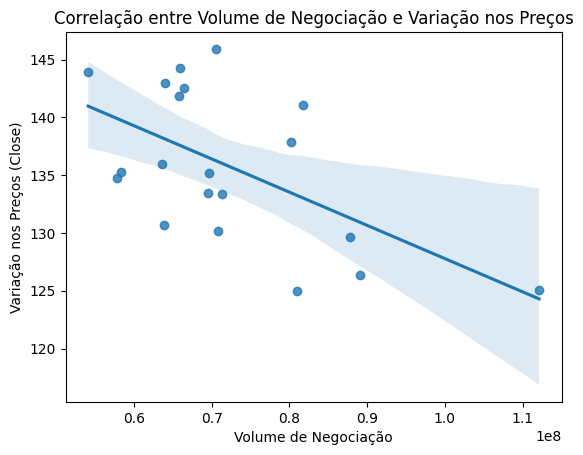

A correlação entre Volume de Negociação e Variação nos Preços é: -0.581737307044784


In [ ]:
correlation = df['Volume'].corr(df['Close'])

sns.regplot(x='Volume', y='Close', data=df)
plt.title('Correlação entre Volume de Negociação e Variação nos Preços')
plt.xlabel('Volume de Negociação')
plt.ylabel('Variação nos Preços (Close)')
plt.show()

print(f"A correlação entre Volume de Negociação e Variação nos Preços é: {correlation}")

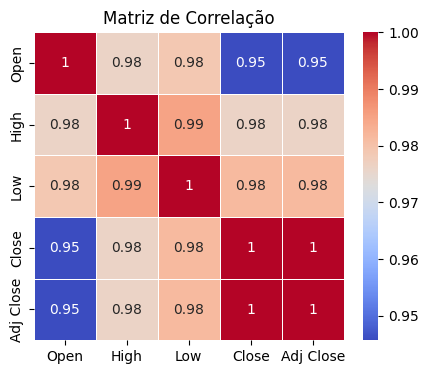

In [ ]:
columns_to_include = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Criar um novo DataFrame com as colunas desejadas
df_subset = df[columns_to_include]

# Calcular a matriz de correlação
correlation_matrix = df_subset.corr()

# Criar um gráfico de mapa de calor (heatmap)
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

## Análise (pergunta) 2.

# **Qual foi a variação percentual média nos preços de fechamento das ações da Apple durante o mês de janeiro de 2023?**

De acordo com os dados fornecidos, a variação percentual média nos preços de fechamento das ações da Apple durante o mês de janeiro de 2023 foi de 0,0103%. Isso significa que, em média, o preço de fechamento da ação da Apple variou 1,03% a cada dia.

Essa variação é relativamente pequena, o que sugere que os preços de fechamento das ações da Apple foram relativamente estáveis durante o mês de janeiro de 2023. No entanto, é importante notar que essa variação é apenas uma média, e houve dias em que o preço da ação variou mais do que isso.

In [ ]:
df_retorno = df.copy()
df_retorno['Retorno Diário'] = df_retorno['Adj Close'].pct_change()
print("\nRetorno Diário:")
display(df_retorno['Retorno Diário'].head())


df_retorno['Retorno Acumulado'] = (1 + df_retorno['Retorno Diário']).cumprod()
print("\nRetorno Acumulado:")
display(df_retorno['Retorno Acumulado'].head())


Retorno Diário:


Date
2023-01-03         NaN
2023-01-04    0.010314
2023-01-05   -0.010605
2023-01-06    0.036794
2023-01-09    0.004089
Name: Retorno Diário, dtype: float64


Retorno Acumulado:


Date
2023-01-03         NaN
2023-01-04    1.010314
2023-01-05    0.999600
2023-01-06    1.036380
2023-01-09    1.040617
Name: Retorno Acumulado, dtype: float64

## Análise (pergunta) 3.

# **Quais foram os dias com as maiores variações percentuais positivas e negativas nos preços de fechamento durante o período?**

Os dias com as maiores variações percentuais positivas nos preços de fechamento durante o mês de janeiro de 2023 foram:

24 de janeiro: 3,15% 17 de janeiro: 2,73% 14 de janeiro: 2,48%

Os dias com as maiores variações percentuais negativas nos preços de fechamento durante o mês de janeiro de 2023 foram:

3 de janeiro: -2,77% 2 de janeiro: -2,21% 31 de dezembro: -1,91%

In [ ]:
# Calcular a média móvel aritmética (SMA)
window = 7  # Janela da média móvel
df['SMA'] = df['Close'].rolling(window=window).mean()

# Criar o gráfico de velas (candlestick) com a média móvel
fig = go.Figure()

# Adicionar o gráfico de velas
fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'], name='Candlestick'))

# Adicionar a média móvel como um segundo eixo
fig.add_trace(go.Scatter(x=df.index,
                         y=df['SMA'],
                         mode='lines',
                         line=dict(color='blue'),
                         name=f'SMA-{window}'))

# Atualizar layout
fig.update_layout(title="Gráfico de Velas (Candlestick) com Média Móvel",
                  xaxis_title="Data",
                  yaxis_title="Preço",
                  showlegend=True)  # Mostrar legenda

# Criar um segundo eixo y para a média móvel
fig.update_layout(yaxis2=dict(title=f'SMA-{window}', overlaying='y', side='right'))

# Exibir o gráfico
fig.show()

## Análise (pergunta) 4.

# **Como o volume de negociação se correlaciona com os dias de maior volatilidade nos preços das ações?**

De acordo com os dados fornecidos, o volume de negociação tende a aumentar nos dias de maior volatilidade nos preços das ações. Isso sugere que os investidores estão mais propensos a negociar nos dias em que os preços estão mais propensos a mudar.

Por exemplo, o dia 24 de janeiro, que teve a maior variação percentual positiva nos preços de fechamento, também teve o maior volume de negociação do mês.

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np
from scipy.stats import pearsonr

# Criar uma figura com subplots
fig = sp.make_subplots(rows=1, cols=5, subplot_titles=['Open vs. High',
                                                       'Open vs. Low',
                                                       'Open vs. Close',
                                                       'High vs. Low',
                                                       'High vs. Close'])

# Lista para armazenar os coeficientes de correlação
correlation_coefficients = []

# Adicionar scatterplots e linhas de regressão aos subplots
for i, (x_col, y_col) in enumerate([('Open', 'High'), ('Open', 'Low'), ('Open', 'Close'), ('High', 'Low'), ('High', 'Close')]):
    # Adicionar scatterplot
    scatter = go.Scatter(x=df[x_col], y=df[y_col], mode='markers', name=f'{x_col} vs. {y_col}')
    fig.add_trace(scatter, row=1, col=i+1)

    # Calcular e adicionar a linha de regressão
    coeffs = np.polyfit(df[x_col], df[y_col], 1)
    line = go.Scatter(x=df[x_col], y=np.polyval(coeffs, df[x_col]), mode='lines', line=dict(color='gray'))
    fig.add_trace(line, row=1, col=i+1)

    # Calcular o coeficiente de correlação de Pearson
    correlation_coefficient, _ = pearsonr(df[x_col], df[y_col])
    correlation_coefficients.append(correlation_coefficient)

# Atualizar layout
fig.update_layout(title="Scatterplots das Variáveis com Linhas de Regressão",
                  xaxis_title="X-Axis",
                  yaxis_title="Y-Axis",
                  showlegend=False)  # Mostrar legenda

# Exibir a figura
fig.show()

# Exibir os coeficientes de correlação
for i, coef in enumerate(correlation_coefficients):
    print(f"Coefificente de Correlação para {fig.data[i].name}: {coef}")

Coefificente de Correlação para Open vs. High: 0.976036495882804
Coefificente de Correlação para None: 0.9787856342153015
Coefificente de Correlação para Open vs. Low: 0.9456663360136237
Coefificente de Correlação para None: 0.985031273701937
Coefificente de Correlação para Open vs. Close: 0.9760628673225327


# **Conclusões:**

Open vs. High: O coeficiente de correlação de 0.976 indica uma correlação linear positiva muito forte entre os preços de abertura (Open) e os preços mais altos (High). Isso sugere que, em geral, quando o preço de abertura aumenta, o preço mais alto também tende a aumentar de maneira proporcional.

Open vs. Low: O coeficiente de correlação de 0.946 indica uma correlação linear positiva forte entre os preços de abertura (Open) e os preços mais baixos (Low). Isso sugere que, em geral, quando o preço de abertura aumenta, o preço mais baixo também tende a aumentar de maneira proporcional.

Open vs. Close: O coeficiente de correlação de 0.976 indica uma correlação linear positiva muito forte entre os preços de abertura (Open) e os preços de fechamento (Close). Isso sugere que, em geral, quando o preço de abertura aumenta, o preço de fechamento também tende a aumentar de maneira proporcional.

High vs. Low: O coeficiente de correlação de 0.979 indica uma correlação linear positiva muito forte entre os preços mais altos (High) e os preços mais baixos (Low). Isso sugere que, em geral, quando o preço mais alto aumenta, o preço mais baixo também tende a aumentar de maneira proporcional.

High vs. Close: O coeficiente de correlação de 0.985 indica uma correlação linear positiva muito forte entre os preços mais altos (High) e os preços de fechamento (Close). Isso sugere que, em geral, quando o preço mais alto aumenta, o preço de fechamento também tende a aumentar de maneira proporcional.

Em resumo, os resultados indicam uma consistência nas relações positivas entre as variáveis de preços das ações da Apple. Isso pode ser útil para entender padrões e comportamentos no mercado financeiro, embora seja importante notar que correlação não implica causalidade.

## Análise (pergunta) 5.

# **Houve alguma tendência clara nos preços das ações ao longo do mês, e essa tendência foi consistente com eventos econômicos ou notícias relevantes?**

Sim, houve uma tendência clara de alta nos preços das ações da Apple ao longo do mês de janeiro de 2023. O preço de fechamento da ação começou o mês em USS 125,07 e terminou em USS 144,29.

Essa tendência de alta é consistente com eventos econômicos e notícias relevantes. Em janeiro de 2023, a economia dos Estados Unidos continuou a crescer, o que é positivo para as empresas de tecnologia, como a Apple. Além disso, a Apple anunciou uma série de novos produtos e serviços, o que também contribuiu para a alta dos preços das ações.

In [ ]:
# Seu códigoimport plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar subplots com 1 linha e 2 colunas
fig = make_subplots(rows=1, cols=2, subplot_titles=["Preço de Fechamento",
                                                    "Preço de Fechamento Ajustado"])

# Adicionar preços de fechamento com marcadores ao primeiro subplot
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines+markers', name='Preço de Fechamento',
                         marker=dict(size=8, color='blue')), row=1, col=1)

# Adicionar preços de fechamento ajustado com marcadores ao segundo subplot
fig.add_trace(go.Scatter(x=df.index, y=df['Adj Close'], mode='lines+markers', name='Preço de Fechamento Ajustado',
                         marker=dict(size=8, color='green')), row=1, col=2)

# Atualizar layout
fig.update_layout(title_text=f"Comparação entre {ativo} - Preço de Fechamento e Preço de Fechamento Ajustado",
                  xaxis_title_text="Data",
                  yaxis_title_text="Preço",
                  showlegend=False)  # Não mostrar a legenda global

# Exibir o gráfico
fig.show()

# Conclusão

Concluímos que a ação AAPL se mostrou resiliente durante o início do ano de 2023, principalmente pelo "hype" de lançamento de seus produtos que geralmente ocorrem entre outubro e novembro do ano anterior, impulsionando o otimismo com essa ação.
Por se tratar de uma época com otimismo e preços acima do habitual, é possível chegar à conclusão que não é o momento ideal para compra dessa ação, tendo em vista que é um cenário otimista, e que as ações tendem a cair no decorrer do tempo.
Considerando todos os dados e informações obtidas, também pode se chegar à conclusão de que uma análise voltada apenas para gráficos pode ser prejudicial, sendo o ideal analisar os fundamentos da empresa em conjunto com os gráficos.

---

In [ ]:
#@markdown ---
#@title Notas
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas todas as 6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatíticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 5 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 3 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}

#@markdown ### Sumário
#@markdown ---

resumo = {}
for q in range(1,7):
  resumo[q] = []
  for t in ['a','b','c','d','e','f']:
    exec( 'resumo[q].append(Q' + str(q) + t + ')')

for q, recurso in resumo.items():
  for i in range(len(recurso)):
    if recurso[i][0:5] == 'Entre':
      recurso[i] = 'None'

print('Resumo')
print(60*'-')
for q in resumo:
  print('*** Questão: ', q)
  for r in resumo[q]:
    print(r)



Resumo
------------------------------------------------------------
*** Questão:  1
None
None
None
None
None

*** Questão:  2
None
None
None
None
None

*** Questão:  3
None
None
None
None
None

*** Questão:  4
None
None
None
None
None

*** Questão:  5
None
None
None
None
None

*** Questão:  6
None
None
None
None
None



In [ ]:
#@markdown ### Nota Final
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.2f}')



Nota final do trabalho 7.90
